# Aprendizaje No Supervisado

Aspectos a considerar a la hora de hacer un cluster:

1. a
2. b
3. c

## Exploración de datos

In [1]:
data("USArrests")
df <- USArrests
head(df)

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


In [2]:
summary(df)

     Murder          Assault         UrbanPop          Rape      
 Min.   : 0.800   Min.   : 45.0   Min.   :32.00   Min.   : 7.30  
 1st Qu.: 4.075   1st Qu.:109.0   1st Qu.:54.50   1st Qu.:15.07  
 Median : 7.250   Median :159.0   Median :66.00   Median :20.10  
 Mean   : 7.788   Mean   :170.8   Mean   :65.54   Mean   :21.23  
 3rd Qu.:11.250   3rd Qu.:249.0   3rd Qu.:77.75   3rd Qu.:26.18  
 Max.   :17.400   Max.   :337.0   Max.   :91.00   Max.   :46.00  

In [3]:
df <- scale(df)
head(df, n=3)

,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388


[1] "Murder"
[1] -7.663087e-17
[1] 1


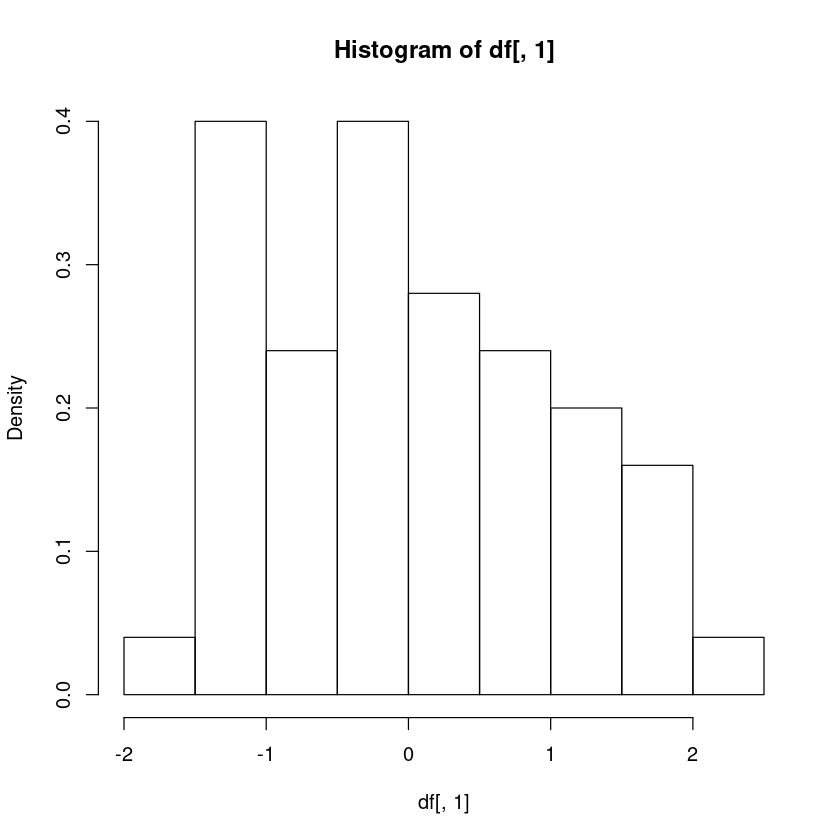

In [4]:
print("Murder")
print(mean(df[,1]))
print(var(df[,1]))
hist(df[,1], prob=TRUE)

[1] "Assault"
[1] 1.112408e-16
[1] 1


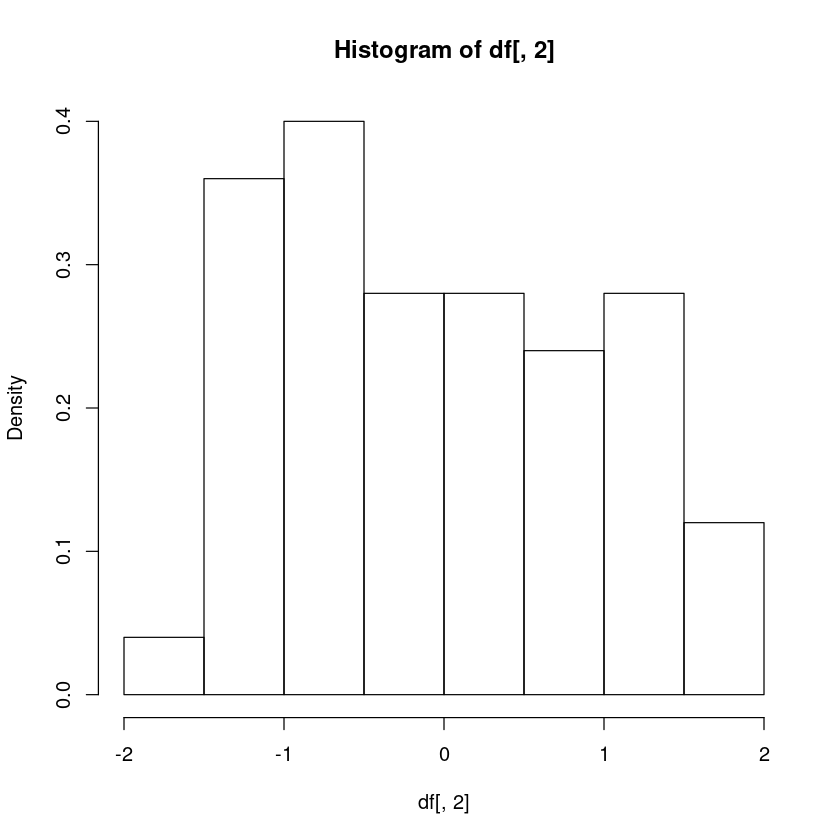

In [5]:
print("Assault")
print(mean(df[,2]))
print(var(df[,2]))
hist(df[,2], prob=TRUE)

In [12]:
#install.packages("cluster")
#install.packages("devtools")
#install.packages(c("cluster", "factoextra"))

In [10]:
library("ggplot2")
library("factoextra")
library("cluster")

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



## Métodos para medir distancias

- Distancia Eucilideana $$d_{euc}(x,y) = \sqrt{|(x_i-y_i)|}$$
  
- Distancia Manhattan 

- Distancia de la correlación de Pearson (1-corr)

- Distancia de Eisen cosine 

- Distancia de correlación de Spearman

- Distancia de correlación de Kendall

## Selección de la muestra

In [23]:
set.seed(123)
ss <- sample(1:50, 15)
df <- USArrests[ss, ]
df.scaled <- scale(df)
df.scaled

,Murder,Assault,UrbanPop,Rape
New Mexico,0.58508090,1.02300309,0.22505574,0.61101857
Iowa,-1.70220419,-1.54760088,-0.68923319,-1.43885018
Indiana,-0.45911447,-0.90775622,-0.12659385,-0.48290177
Arizona,-0.23535832,1.12403120,0.92835492,0.50261205
Tennessee,1.03259320,-0.06585536,-0.54857336,0.09855138
Texas,0.90828422,0.08007413,0.92835492,-0.03942055
Oregon,-1.03093574,-0.39139036,0.01406598,0.33507470
West Virginia,-0.83204139,-1.26696726,-1.95517172,-1.63595295
Missouri,-0.01160217,-0.17810880,0.22505574,0.22666818
Montana,-0.75745600,-0.95265760,-0.97055287,-0.93623813


## Cálculo de la distancia eucilideana

In [17]:
dist.eucl <- dist(df.scaled, method="euclidean")
dist.eucl

               New Mexico      Iowa   Indiana   Arizona Tennessee     Texas
Iowa            4.1082312                                                  
Indiana         2.4775986 1.7846775                                        
Arizona         1.0907378 3.9591819 2.5024750                              
Tennessee       1.4990012 3.4724739 1.8574561 2.3169189                    
Texas           1.3824891 3.7468614 2.0384260 1.6405987 1.4956943          
Oregon          2.1754724 2.3299921 1.1324681 1.9476753 2.1763803 2.2268866
West Virginia   4.1297061 1.5739722 2.2229105 4.3544334 3.1474682 3.9631926
Missouri        1.3951436 2.8885151 1.1661044 1.5219757 1.3106718 1.2158464
Montana         3.0869279 1.2562907 1.0043926 3.2033362 2.2890064 2.8725177
Nebraska        3.1647982 0.9620290 0.8810612 3.0302391 2.6311604 2.8258957
California      1.8025742 4.7971697 3.2592923 1.2587645 2.9923364 2.0899781
South Carolina  1.9621250 4.1334214 2.8509464 2.8719947 1.3852857 2.4693498
Nevada      

In [28]:
# Distancia entre estaodos para la variable 'Murder' -> 1

round(as.matrix(dist.eucl)[1:5, 1:5], 1)

,New Mexico,Iowa,Indiana,Arizona,Tennessee
New Mexico,0.0,4.1,2.5,1.1,1.5
Iowa,4.1,0.0,1.8,4.0,3.5
Indiana,2.5,1.8,0.0,2.5,1.9
Arizona,1.1,4.0,2.5,0.0,2.3
Tennessee,1.5,3.5,1.9,2.3,0.0


## Distancia basada en correlación

In [26]:
dist.cor <- get_dist(df.scaled, method="pearson")
round(as.matrix(dist.cor)[1:5, 1:5], 1)

,New Mexico,Iowa,Indiana,Arizona,Tennessee
New Mexico,0.0,1.7,2.0,0.8,0.8
Iowa,1.7,0.0,0.3,0.5,1.8
Indiana,2.0,0.3,0.0,1.2,1.2
Arizona,0.8,0.5,1.2,0.0,1.9
Tennessee,0.8,1.8,1.2,1.9,0.0


## Computando distancias cuando se tienen diferentes datos

In [29]:
data(flower)
head(flower, 3)

,V1,V2,V3,V4,V5,V6,V7,V8
,<fct>,<fct>,<fct>,<fct>,<ord>,<ord>,<dbl>,<dbl>
1,0,1,1,4,3,15,25,15
2,1,0,0,2,1,3,150,50
3,0,1,0,3,3,1,150,50


In [30]:
str(flower)

'data.frame':	18 obs. of  8 variables:
 $ V1: Factor w/ 2 levels "0","1": 1 2 1 1 1 1 1 1 2 2 ...
 $ V2: Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 1 2 2 ...
 $ V3: Factor w/ 2 levels "0","1": 2 1 1 2 1 1 1 2 1 1 ...
 $ V4: Factor w/ 5 levels "1","2","3","4",..: 4 2 3 4 5 4 4 2 3 5 ...
 $ V5: Ord.factor w/ 3 levels "1"<"2"<"3": 3 1 3 2 2 3 3 2 1 2 ...
 $ V6: Ord.factor w/ 18 levels "1"<"2"<"3"<"4"<..: 15 3 1 16 2 12 13 7 4 14 ...
 $ V7: num  25 150 150 125 20 50 40 100 25 100 ...
 $ V8: num  15 50 50 50 15 40 20 15 15 60 ...


In [35]:
dd <- daisy(flower)
round(as.matrix(dd)[1:3, 1:3], 2)

,1,2,3
1,0.00,0.89,0.53
2,0.89,0.00,0.51
3,0.53,0.51,0.00


## Visualización de las matrices de distancia

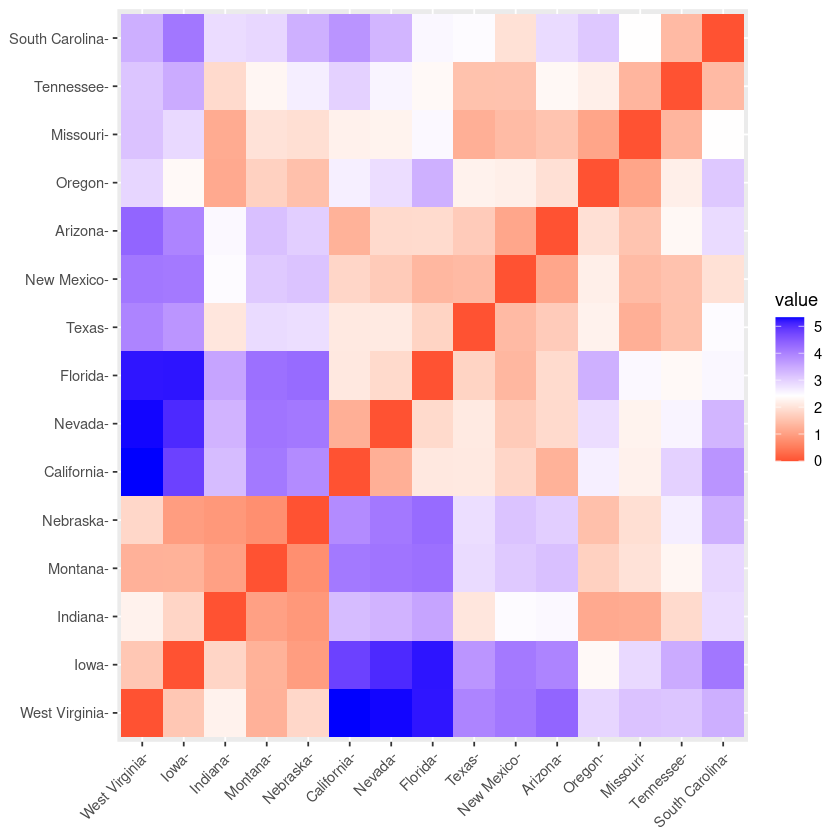

In [36]:
fviz_dist(dist.eucl)

## Partioning Clustering

In [38]:
data("USArrests")
df <- USArrests
head(df, 3)

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0


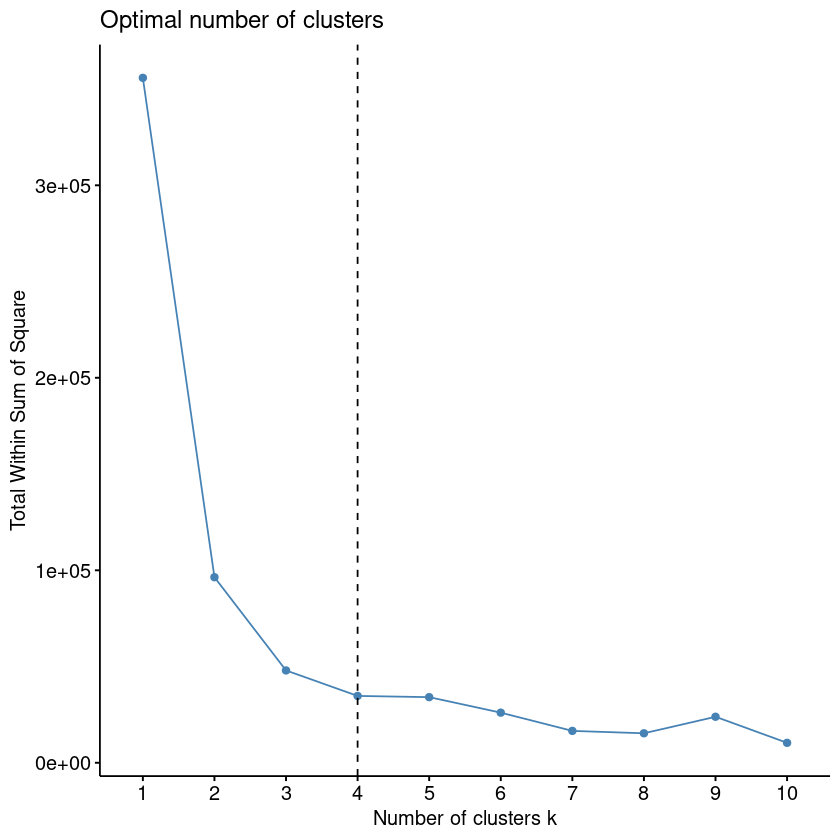

In [39]:
fviz_nbclust(df, kmeans, method = "wss") + geom_vline(xintercept = 4, linetype = 2)

## $k$-Means

In [40]:
set.seed(123)
km.res <- kmeans(df, 4, nstart = 25)

In [41]:
print(km.res)

K-means clustering with 4 clusters of sizes 14, 10, 10, 16

Cluster means:
     Murder  Assault UrbanPop     Rape
1  8.214286 173.2857 70.64286 22.84286
2  5.590000 112.4000 65.60000 17.27000
3  2.950000  62.7000 53.90000 11.51000
4 11.812500 272.5625 68.31250 28.37500

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             4              4              4              1              4 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             1              2              4              4              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              2              4              2              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             2              2              4              3              4 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             1            

In [42]:
aggregate(USArrests, by=list(cluster=km.res$cluster), mean)

cluster,Murder,Assault,UrbanPop,Rape
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,8.214286,173.2857,70.64286,22.84286
2,5.590000,112.4000,65.60000,17.27000
3,2.950000,62.7000,53.90000,11.51000
4,11.812500,272.5625,68.31250,28.37500


In [43]:
dd <- cbind(USArrests, cluster = km.res$cluster)
head(dd)

,Murder,Assault,UrbanPop,Rape,cluster
,<dbl>,<int>,<int>,<dbl>,<int>
Alabama,13.2,236,58,21.2,4
Alaska,10.0,263,48,44.5,4
Arizona,8.1,294,80,31.0,4
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,4
Colorado,7.9,204,78,38.7,1


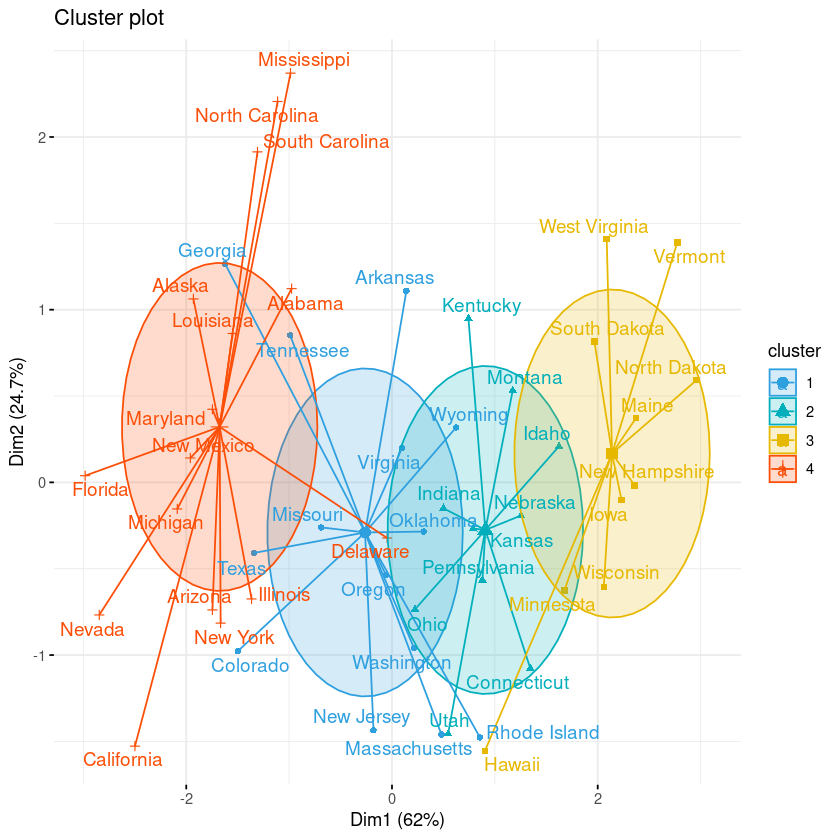

In [45]:
fviz_cluster(
    km.res, data = df,
    palette = c("#2E9FDF", "#00AFBB", "#E7B800", "#FC4E07"),
    ellipse.type = "euclid", # Concentration ellipse
    star.plot = TRUE, # Add segments from centroids to items
    repel = TRUE, # Avoid label overplotting (slow)
    ggtheme = theme_minimal()
)

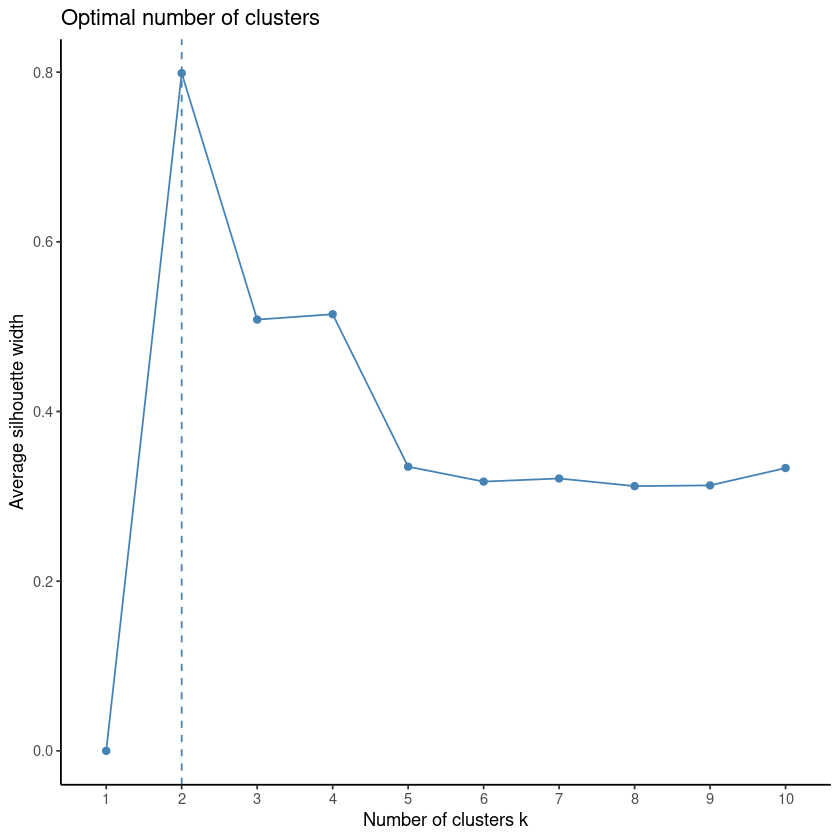

In [64]:
fviz_nbclust(df, pam, method = "silhouette")+
theme_classic()

Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”


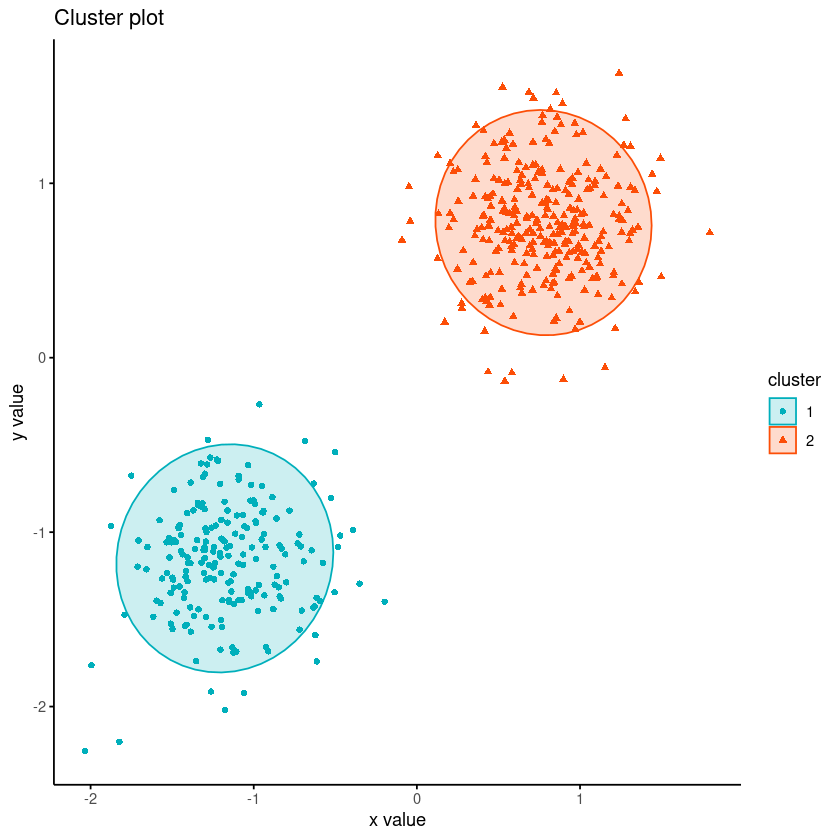

In [65]:
pam.res <- pam(df, 2)
dd <- cbind(USArrests, cluster = pam.res$cluster)

fviz_cluster(pam.res,
palette = c("#00AFBB", "#FC4E07"), # color palette
ellipse.type = "t", # Concentration ellipse
geom = "point",
ggtheme = theme_classic()
)

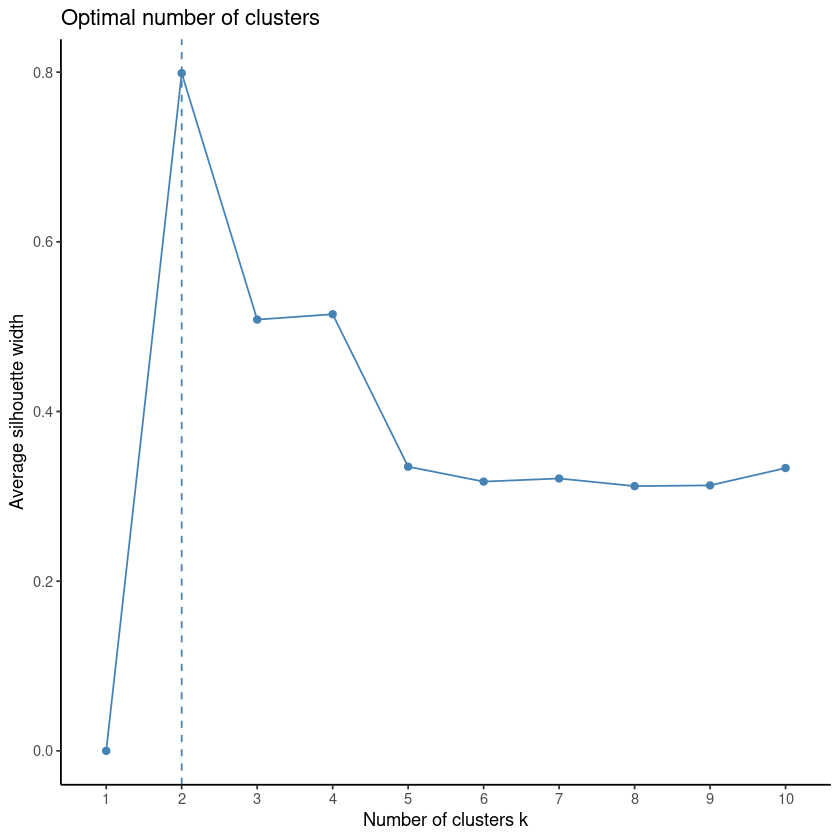

In [48]:
set.seed(1234)
# Generate 500 objects, divided into 2 clusters.
df <- rbind(cbind(rnorm(200,0,8), rnorm(200,0,8)),
cbind(rnorm(300,50,8), rnorm(300,50,8)))
# Specify column and row names
colnames(df) <- c("x", "y")

fviz_nbclust(df, pam, method = "silhouette")+
theme_classic()

In [51]:
clara.res <- clara(df, k=2, samples=50, pamLike = TRUE)
print(clara.res)

Call:	 clara(x = df, k = 2, samples = 50, pamLike = TRUE) 
Medoids:
             x         y
[1,] -1.531137  1.145057
[2,] 48.357304 50.233499
Objective function:	 9.87862
Clustering vector: 	 int [1:500] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
Cluster sizes:	    	 200 300 
Best sample:
 [1]  37  49  54  63  68  71  76  80  82 101 103 108 109 118 121 128 132 138 144
[20] 162 203 210 216 231 234 249 260 261 286 299 304 305 312 315 322 350 403 450
[39] 454 455 456 465 488 497

Available components:
 [1] "sample"     "medoids"    "i.med"      "clustering" "objective" 
 [6] "clusinfo"   "diss"       "call"       "silinfo"    "data"      


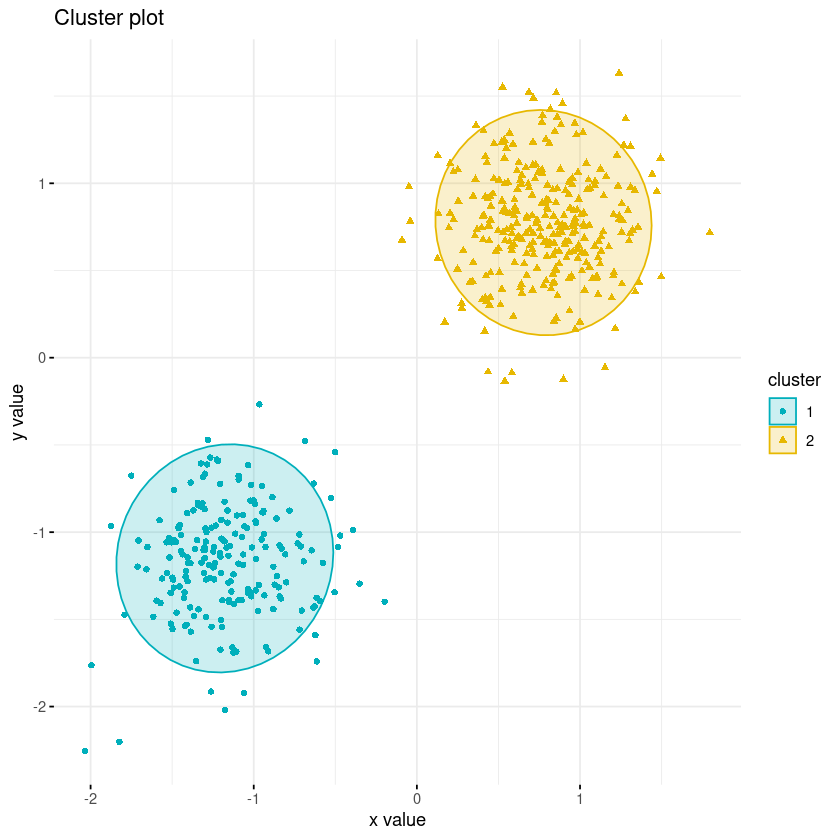

In [70]:
fviz_cluster(
    clara.res, data = df,
    palette = c("#00AFBB", "#E7B800"),
    ellipse.type = "t", # Concentration ellipse
    geom = "point",
    ggtheme = theme_minimal()
)